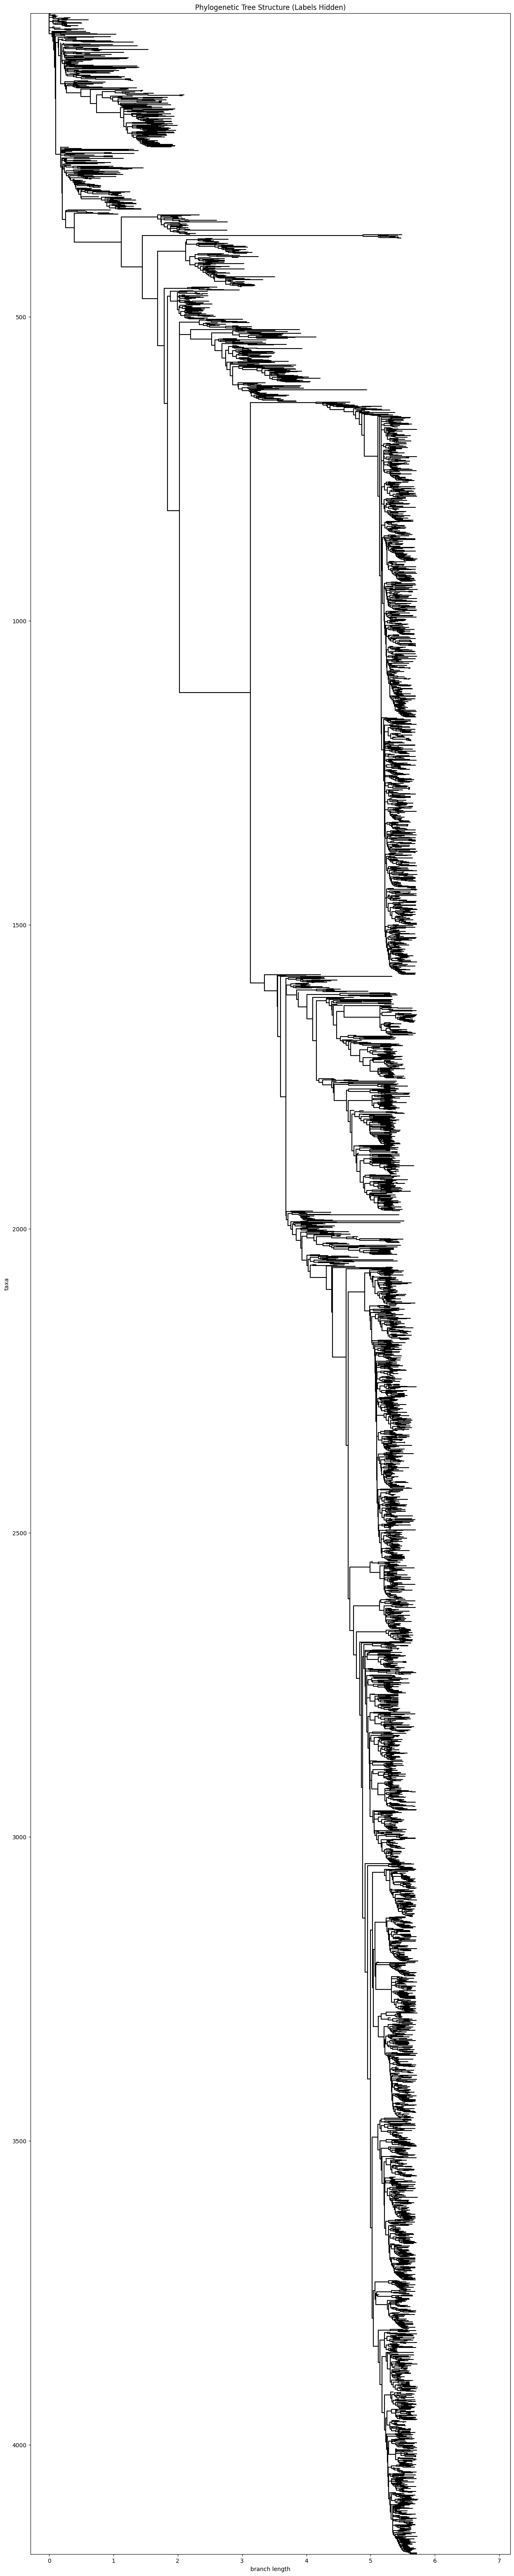

In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Define the path to your .nwk file
tree_file = "../data1/nextstrain_ncov_gisaid_global_6m_timetree.nwk"

# Load the tree
tree = Phylo.read(tree_file, "newick")

# --- Visualization Settings ---
# 1. Increase Figure Height significantly
# Width: 15, Height: 80 (or even 100+ depending on tree size)
fig = plt.figure(figsize=(15, 80), dpi=100) 
axes = fig.add_subplot(1, 1, 1)

# 2. Hide Labels to see the structure
# 'label_func=lambda x: ""' effectively removes all text labels
Phylo.draw(tree, axes=axes, do_show=False, label_func=lambda x: "")

# Optional: If you really want labels, only show them for specific nodes
# Phylo.draw(tree, axes=axes, do_show=False, 
#            label_func=lambda x: x.name if x.name and "Wuhan" in x.name else "")

plt.title("Phylogenetic Tree Structure (Labels Hidden)")
plt.show()

In [2]:
# Example: Print the names of the first 10 terminal nodes (leaves)
print("First 10 samples in the tree:")
for i, clade in enumerate(tree.get_terminals()):
    if i >= 10: break
    print(f"- {clade.name}")

# Example: Find the path to a specific node if you know its name
# target = tree.find_any("Name_Of_Isolate")
# if target:
#     path = tree.get_path(target)

First 10 samples in the tree:
- hCoV-19/Wuhan/IME-WH04/2019
- hCoV-19/Wuhan/IVDC-HB-GX02/2019
- hCoV-19/India/MH-1-27/2020
- hCoV-19/Guangdong/20SF630/2020
- hCoV-19/Shandong/2020C1240460/2020
- hCoV-19/Shanghai/SH0041/2020
- hCoV-19/India/MH-1-31/2020
- hCoV-19/Hubei/WIV-YB0420_054/2020
- hCoV-19/USA/IL-RUSH-00822/2020
- hCoV-19/China/FU-P105-3/2020


In [4]:
# 1. INSPECT THE ROOT (The Origin)
print(f"--- ROOT NODE ---")
print(f"Does the tree have a root? {tree.rooted}")
# The root usually has a branch length of 0 or close to it
print(f"Root branch length: {tree.root.branch_length}")


# 2. COMPARE TWO SAMPLES (Siblings vs Cousins)
# Let's grab the first sample and the 500th sample to compare them
sample_A = tree.get_terminals()[0]
sample_B = tree.get_terminals()[500]

print(f"\n--- COMPARING SAMPLES ---")
print(f"Sample A: {sample_A.name}")
print(f"Sample B: {sample_B.name}")

# Calculate evolutionary distance (mutations/time between them)
distance = tree.distance(sample_A, sample_B)
print(f"Distance between A and B: {distance:.5f}")


# 3. FIND THE COMMON ANCESTOR
# This finds the specific "parent" node where their paths diverged
ancestor = tree.common_ancestor(sample_A, sample_B)
print(f"Their most recent common ancestor is at depth: {len(ancestor.get_terminals())} descendants")


# 4. FIND THE "MOST EVOLVED" SAMPLE
# We look for the sample with the longest distance from the root
max_depth = 0
deepest_node = None

for node in tree.get_terminals():
    dist = tree.distance(tree.root, node)
    if dist > max_depth:
        max_depth = dist
        deepest_node = node

print(f"\n--- MOST EVOLVED SAMPLE ---")
print(f"Sample furthest from root: {deepest_node.name}")
print(f"Distance from root: {max_depth:.5f}")

--- ROOT NODE ---
Does the tree have a root? False
Root branch length: 0.0

--- COMPARING SAMPLES ---
Sample A: hCoV-19/Wuhan/IME-WH04/2019
Sample B: hCoV-19/India/GJ-INSACOG-GBRC6735/2022
Distance between A and B: 2.27300
Their most recent common ancestor is at depth: 4179 descendants

--- MOST EVOLVED SAMPLE ---
Sample furthest from root: hCoV-19/Poland/WSSEGorzow-25S0086/2025
Distance from root: 5.73700


In [8]:
# Search for a specific variant or string in sample names
search_term = "2025"
matches = []

print(f"--- Searching for '{search_term}' ---")

# Iterate through all terminal nodes (leaves)
for clade in tree.get_terminals():
    if clade.name and search_term in clade.name:
        matches.append(clade)

# Report results
print(f"Found {len(matches)} samples matching '{search_term}'.")

if matches:
    print("\nFirst 5 matches:")
    for m in matches[:5]:
        print(f"- {m.name}")
        
    # Optional: Find the most recent one (if dates are in names)
    print(f"\nLast match in list (often most recent):")
    print(f"- {matches[-1].name}")
else:
    print("No matches found. Check the exact spelling or casing.")

--- Searching for '2025' ---
Found 3411 samples matching '2025'.

First 5 matches:
- hCoV-19/Netherlands/NH-RIVM-145636/2025
- hCoV-19/SouthAfrica/NICD-R03487/2025
- hCoV-19/SouthAfrica/NICD-R04779/2025
- hCoV-19/SouthAfrica/NICD-R04410/2025
- hCoV-19/SouthAfrica/NICD-N58960/2025

Last match in list (often most recent):
- hCoV-19/Netherlands/FR-RIVM-146172/2025


In [3]:
import pandas as pd

# Load Nextstrain metadata file into a dataframe
metadata_fp = "../data1/nextstrain_ncov_open_global_6m_metadata.tsv"
df_metadata = pd.read_csv(metadata_fp, sep='\t')
print(f"Loaded metadata with {df_metadata.shape[0]} rows and {df_metadata.shape[1]} columns")


Loaded metadata with 4551 rows and 20 columns


In [12]:
df_metadata[df_metadata['strain'] == 'NICD-N58960']

,strain,date,host,country,epiweek,Nextclade_pango,region,division,emerging_lineage,pango_lineage,submitting_lab,clade_membership,S1_mutations,recency,genbank_accession,author,originating_lab,immune_escape,ace2_binding,mlr_lineage_fitness


In [13]:
df_metadata.head(1)

,strain,date,host,country,epiweek,Nextclade_pango,region,division,emerging_lineage,pango_lineage,submitting_lab,clade_membership,S1_mutations,recency,genbank_accession,author,originating_lab,immune_escape,ace2_binding,mlr_lineage_fitness
0,IND/29/2020,2020-01-27,Homo sapiens,India,202005,B,Asia,Kerala,19A,B,"National Institute of Virology, Maximum Contai...",19A,2.0,Older,MT012098,Yadav et al,NaN,NaN,NaN,NaN


In [14]:
import pandas as pd
from Bio import Phylo

# 1. Load Metadata
meta_path = "../data1/nextstrain_ncov_open_global_6m_metadata.tsv"
df = pd.read_csv(meta_path, sep='\t')

# 2. Filter for 'XFG' in the lineage columns
# We check both columns just in case
target_variant = "XFG"
xfg_data = df[
    (df['Nextclade_pango'] == target_variant) | 
    (df['pango_lineage'] == target_variant)
]

print(f"Found {len(xfg_data)} metadata records for {target_variant}")

# 3. Extract the list of XFG strain names
# Clean up names if necessary (sometimes tree has 'hCoV-19/' and metadata doesn't)
xfg_strains = set(xfg_data['strain'].values)

# 4. Find these strains in the Phylogenetic Tree
tree_file = "../data1/nextstrain_ncov_gisaid_global_6m_timetree.nwk"
tree = Phylo.read(tree_file, "newick")

xfg_nodes = []
for node in tree.get_terminals():
    # Check if the tree node name contains the metadata strain name
    # We use 'in' because of potential 'hCoV-19/' prefix mismatches
    for strain in xfg_strains:
        if strain in node.name: 
            xfg_nodes.append(node)
            break

print(f"Found {len(xfg_nodes)} matching nodes in the tree.")

# 5. Print some confirmed XFG samples from the tree
if xfg_nodes:
    print("\nExample XFG Tree Nodes:")
    for n in xfg_nodes[:5]:
        print(f"- {n.name}")

Found 837 metadata records for XFG
Found 18 matching nodes in the tree.

Example XFG Tree Nodes:
- hCoV-19/Denmark/DCGC-692631/2025
- hCoV-19/Denmark/DCGC-692284/2025
- hCoV-19/Denmark/DCGC-692520/2025
- hCoV-19/Denmark/DCGC-692453/2025
- hCoV-19/Denmark/DCGC-692529/2025


In [17]:
xfg_data.iloc[0]['strain']

'IGS-10285-CVDP-5E8D283D-609E-4561-A299-885818A15C93'

In [18]:
xfg_data.head(3)

,strain,date,host,country,epiweek,Nextclade_pango,region,division,emerging_lineage,pango_lineage,submitting_lab,clade_membership,S1_mutations,recency,genbank_accession,author,originating_lab,immune_escape,ace2_binding,mlr_lineage_fitness
2399,IGS-10285-CVDP-5E8D283D-609E-4561-A299-885818A...,2025-09-02,NaN,Germany,202536,XGA,Europe,NaN,24A,XFG,NaN,24H (LF.7),62.0,Older,NaN,?,NaN,1.93,-2.61,NaN
2402,IGS-10285-CVDP-E56BDE61-AC29-4CA2-9F91-3EC11E9...,2025-07-23,NaN,Germany,202530,XFG,Europe,NaN,24A,XFG.21,NaN,24H (LF.7),61.0,Older,NaN,?,NaN,1.88,-2.65,1.32
2403,IGS-10285-CVDP-338D8C55-B077-4130-B9EE-C22394A...,2025-08-21,NaN,Germany,202534,XFG,Europe,NaN,24A,XFG,NaN,24H (LF.7),61.0,Older,NaN,?,NaN,1.88,-2.65,1.32


In [ ]:
import pandas as pd
from Bio import Phylo

# --- 1. Load Files ---
# Update this path to your NEW metadata file
#meta_path = "../data1/metadata.tsv" 
tree_file = "../data1/nextstrain_ncov_gisaid_global_6m_timetree.nwk"

# Load metadata (handling potential issues with the first row '?')
# 'low_memory=False' helps with mixed types in columns
df = pd.read_csv('../data1/metadata.tsv.zst', sep='\t', compression='zstd')
tree = Phylo.read(tree_file, "newick")

# --- 2. Inspect Column Names to be Sure ---
# (Optional: Print columns to verify 'Nextclade_pango' exists)
# print(df.columns)

# --- 3. Create Mapping Dictionary ---
# We map 'strain' -> {Full Row Data}
# We filter out rows where 'strain' is missing or '?'
df_clean = df[df['strain'] != '?'].copy()
meta_dict = df_clean.set_index('strain').to_dict('index')

# --- 4. Define Search Target ---
target_variant = "XFG"

# --- 5. Search the Tree ---
print(f"{'Tree Node Name':<45} | {'Pango Lineage':<15} | {'Clade (Nextstrain)':<15}")
print("-" * 80)

found_count = 0

for node in tree.get_terminals():
    # Clean the tree name to match metadata format
    # Tree: hCoV-19/ARG/210316-1/2021 -> Metadata: ARG/210316-1/2021
    clean_name = node.name.replace("hCoV-19/", "")
    
    if clean_name in meta_dict:
        data = meta_dict[clean_name]
        
        # Get lineage info
        pango = str(data.get('Nextclade_pango', ''))
        clade = str(data.get('clade_nextstrain', ''))
        
        # Check if it matches our target (XFG)
        # We use .startswith() to catch sub-lineages like XFG.1, XFG.2 if you want
        if target_variant in pango:
            print(f"{clean_name:<45} | {pango:<15} | {clade:<15}")
            found_count += 1

print(f"\nTotal nodes matching '{target_variant}': {found_count}")

/var/folders/fr/gfqqb60s0ldfjkfv6636pfvc0000gn/T/ipykernel_7522/1514048153.py:11: DtypeWarning: Columns (4,5,10,29,35,36,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data1/metadata.tsv.zst',


Tree Node Name                                | Pango Lineage   | Clade (Nextstrain)
--------------------------------------------------------------------------------
USA/MD-MDH-12024/2025                         | XFG.3.2         | 25C            
Denmark/DCGC-692369/2025                      | XFG.3.4         | 25C            
USA/CA-LACPHL-AY13676/2025                    | XFG.3.4.2       | 25C            
Denmark/DCGC-692351/2025                      | XFG.3.4.2       | 25C            
Denmark/DCGC-692349/2025                      | XFG.3.4.3       | 25C            
Denmark/DCGC-692771/2025                      | XFG.3.4.3       | 25C            
Denmark/DCGC-692687/2025                      | XFG.3.4.1       | 25C            
USA/MD-MDH-12015/2025                         | XFG.3.4.1       | 25C            
Denmark/DCGC-692257/2025                      | XFG.3.5         | 25C            
Switzerland/BE-IFIK-250526_os_04/2025         | XFG.3           | 25C            
Denmark/DCGC-6

In [6]:
import pandas as pd
from Bio import Phylo

# --- 1. Load Compressed Metadata ---
# 'compression="zstd"' tells pandas to unzip it on the fly
# 'low_memory=False' prevents mixed-type warnings
meta_path = "../data1/metadata.tsv.zst"
df = pd.read_csv(meta_path, sep='\t', compression='zstd', low_memory=False)

# --- 2. Load Tree ---
tree_file = "../data1/nextstrain_ncov_open_global_all-time_timetree.nwk"
tree = Phylo.read(tree_file, "newick")

# --- 3. Create General Mapping Dictionary ---
# Filter valid strains first to avoid errors
df_clean = df.dropna(subset=['strain']) 
df_clean = df_clean[df_clean['strain'] != '?']

# Create the dictionary: Key = strain name, Value = full row
meta_dict = df_clean.set_index('strain').to_dict('index')

print(f"Loaded metadata for {len(meta_dict)} strains.")


# --- 4. Define a Lookup Function ---
def get_node_metadata(tree_node_name):
    """
    Returns metadata dict for a given tree node name.
    Handles 'hCoV-19/' prefix differences.
    """
    # 1. Try exact match
    if tree_node_name in meta_dict:
        return meta_dict[tree_node_name]
    
    # 2. Try removing prefix
    clean_name = tree_node_name.replace("hCoV-19/", "")
    if clean_name in meta_dict:
        return meta_dict[clean_name]
        
    return None


# --- 5. Verify Connection (General Test) ---
# Check the first 5 leaf nodes in the tree to see if we find them
print("\n--- General Connection Test ---")
found = 0
total_checked = 0

for node in tree.get_terminals()[:20]: # Check first 10
    total_checked += 1
    data = get_node_metadata(node.name)
    
    if data:
        print(f"[MATCH] {node.name} -> Country: {data.get('country')}, Lineage: {data.get('Nextclade_pango')}, clade: {data.get('clade_nextstrain')} ,pango_lineage: {data.get('pango_lineage')}")
        found += 1
    else:
        print(f"[MISSING] {node.name}")

print(f"\nResult: Matched {found}/{total_checked} sampled nodes.")

Loaded metadata for 9400225 strains.

--- General Connection Test ---
[MATCH] Homosampiens/CHN/YB20200116087/2020 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Wuhan/WIV05/2019 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Wuhan/IPBCAMS-WH-02/2019 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Wuhan/WH01/2019 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] CHN/Hefei-37/2020 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] CHN/Hefei-20/2020 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Wuhan/IPBCAMS-WH-03/2019 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Wuhan/WIV07/2019 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] Homosampiens/CHN/AY012/2020 -> Country: China, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] VNM/nCoV-19-01S/2020 -> Country: Vietnam, Lineage: B, clade: 19A ,pango_lineage: B
[MATCH] VNM/nCoV-19-02S/202

Loading metadata...
Filtering metadata by date...
Total strains in metadata: 9310962
Strains before April 30, 2020: 65233

Loading phylogenetic tree...
Total terminal nodes in original tree: 2967

Identifying nodes to keep...
Nodes to keep: 255
Nodes to remove: 2712

Pruning tree...

Filtered tree has 255 terminal nodes

Visualizing tree...


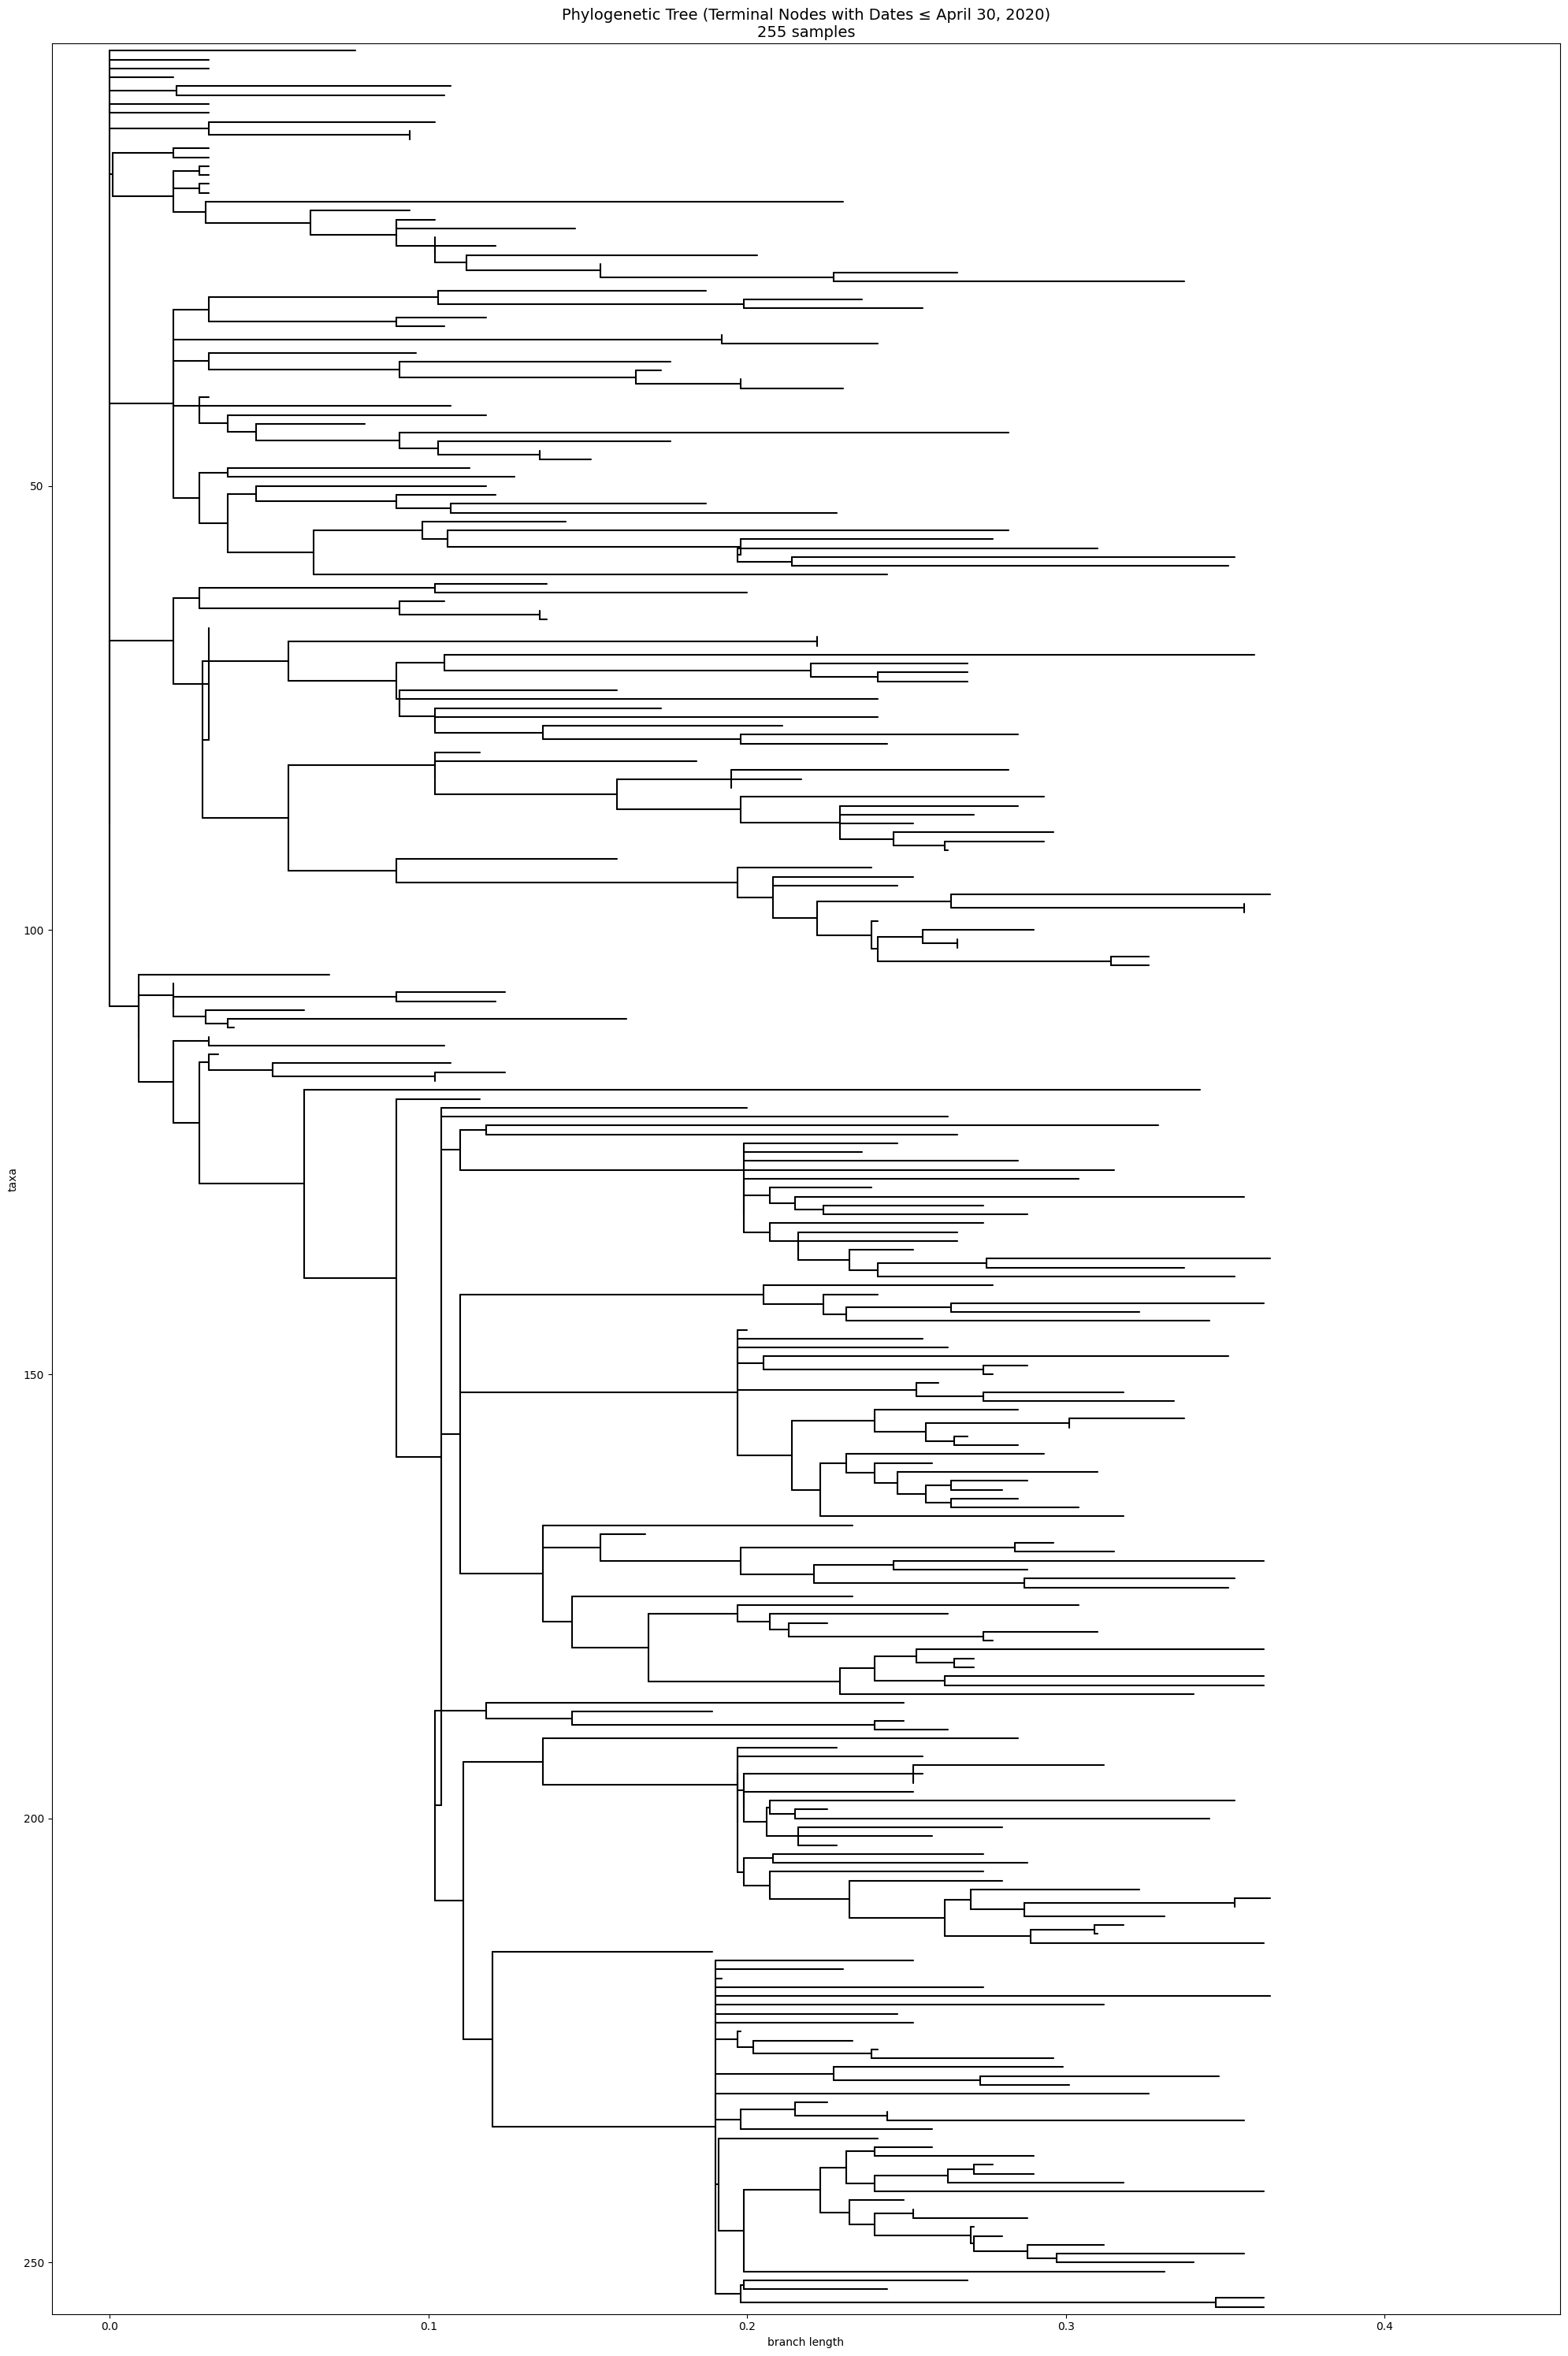


--- Sample Strains in Filtered Tree ---
1. Homosampiens/CHN/YB20200116087/2020
   Date: 2020-01-16
   Country: China
   Lineage: B

2. Wuhan/WIV05/2019
   Date: 2019-12-30
   Country: China
   Lineage: B

3. Wuhan/IPBCAMS-WH-02/2019
   Date: 2019-12-30
   Country: China
   Lineage: B

4. Wuhan/WH01/2019
   Date: 2019-12-26
   Country: China
   Lineage: B

5. CHN/Hefei-37/2020
   Date: 2020-01-27
   Country: China
   Lineage: B

6. CHN/Hefei-20/2020
   Date: 2020-01-26
   Country: China
   Lineage: B

7. Wuhan/IPBCAMS-WH-03/2019
   Date: 2019-12-30
   Country: China
   Lineage: B

8. Wuhan/WIV07/2019
   Date: 2019-12-30
   Country: China
   Lineage: B

9. Homosampiens/CHN/AY012/2020
   Date: 2020-01-25
   Country: China
   Lineage: B

10. VNM/nCoV-19-01S/2020
   Date: 2020-01-22
   Country: Vietnam
   Lineage: B


Filtered tree saved to: ../data1/filtered_tree_before_april30_2020.nwk


In [1]:
import pandas as pd
from Bio import Phylo
import matplotlib.pyplot as plt
from datetime import datetime

# --- 1. Load Metadata ---
print("Loading metadata...")
meta_path = "../data1/metadata.tsv.zst"
df = pd.read_csv(meta_path, sep='\t', compression='zstd', low_memory=False)

# --- 2. Filter by Date (Before April 30, 2020) ---
print("Filtering metadata by date...")
# Remove rows where 'date' is missing or '?'
df = df[df['date'].notna()]
df = df[df['date'] != '?']

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove any rows with failed conversion (NaT)
df = df[df['date'].notna()]

# Filter for dates before April 30, 2020
cutoff_date = datetime(2020, 4, 30)
df_filtered = df[df['date'] <= cutoff_date]

print(f"Total strains in metadata: {len(df)}")
print(f"Strains before April 30, 2020: {len(df_filtered)}")

# Create a set of valid strain names for quick lookup
valid_strains = set(df_filtered['strain'].values)

# --- 3. Load the Phylogenetic Tree ---
print("\nLoading phylogenetic tree...")
tree_file = "../data1/nextstrain_ncov_open_global_all-time_timetree.nwk"
tree = Phylo.read(tree_file, "newick")

total_terminals = len(tree.get_terminals())
print(f"Total terminal nodes in original tree: {total_terminals}")

# --- 4. Identify Terminal Nodes to Keep ---
print("\nIdentifying nodes to keep...")
nodes_to_keep = []
nodes_to_remove = []

for node in tree.get_terminals():
    # Clean the tree name to match metadata format
    clean_name = node.name.replace("hCoV-19/", "")
    
    # Check if this strain is in our filtered metadata
    if clean_name in valid_strains or node.name in valid_strains:
        nodes_to_keep.append(node)
    else:
        nodes_to_remove.append(node)

print(f"Nodes to keep: {len(nodes_to_keep)}")
print(f"Nodes to remove: {len(nodes_to_remove)}")

# --- 5. Prune the Tree ---
print("\nPruning tree...")
# Create a copy of the tree for pruning
tree_filtered = tree

# Prune nodes that don't match our criteria
for node in nodes_to_remove:
    tree_filtered.prune(node)

# --- 6. Verify the Filtered Tree ---
filtered_terminals = len(tree_filtered.get_terminals())
print(f"\nFiltered tree has {filtered_terminals} terminal nodes")

# --- 7. Visualize the Filtered Tree ---
print("\nVisualizing tree...")
fig = plt.figure(figsize=(20, 30), dpi=100)
axes = fig.add_subplot(1, 1, 1)

# Draw the tree (hide labels if too many)
if filtered_terminals < 100:
    Phylo.draw(tree_filtered, axes=axes, do_show=False)
else:
    Phylo.draw(tree_filtered, axes=axes, do_show=False, label_func=lambda x: "")

plt.title(f"Phylogenetic Tree (Terminal Nodes with Dates ≤ April 30, 2020)\n{filtered_terminals} samples", 
          fontsize=14)
plt.tight_layout()
plt.show()

# --- 8. Optional: Print Some Sample Strains ---
print("\n--- Sample Strains in Filtered Tree ---")
for i, node in enumerate(tree_filtered.get_terminals()[:10]):
    clean_name = node.name.replace("hCoV-19/", "")
    
    # Get metadata for this strain
    if clean_name in valid_strains:
        strain_data = df_filtered[df_filtered['strain'] == clean_name].iloc[0]
        print(f"{i+1}. {clean_name}")
        print(f"   Date: {strain_data['date'].strftime('%Y-%m-%d')}")
        print(f"   Country: {strain_data['country']}")
        print(f"   Lineage: {strain_data.get('pango_lineage', 'N/A')}")
        print()

# --- 9. Optional: Save the Filtered Tree ---
output_file = "../data1/filtered_tree_before_april30_2020.nwk"
Phylo.write(tree_filtered, output_file, "newick")
print(f"\nFiltered tree saved to: {output_file}")

In [4]:
df['country'].value_counts()

country
USA               3763002
United Kingdom    3235659
Germany           1299877
Denmark            512617
Switzerland        160606
                   ...   
Luxembourg              1
Belarus                 1
Micronesia              1
Namibia                 1
Zambia                  1
Name: count, Length: 127, dtype: int64

In [11]:
# Function to clean and combine location fields intelligently
def create_clean_location(row):
    """
    Combines location, division, country intelligently:
    - Skips empty, null, or '?' values
    - Only uses non-empty fields
    - Returns None if all fields are empty
    """
    fields = []
    
    for field in [row.get('location'), row.get('division'), row.get('country')]:
        # Convert to string and strip whitespace
        field_str = str(field).strip() if pd.notna(field) else ''
        
        # Skip if empty, 'nan', '?', or just whitespace
        if field_str and field_str != 'nan' and field_str != '?' and field_str != '':
            fields.append(field_str)
    
    # Return combined string or None
    return ', '.join(fields) if fields else None

# Apply the cleaning function
df['full_loc'] = df.apply(create_clean_location, axis=1)

In [12]:
df['full_loc'].value_counts()

full_loc
England, United Kingdom            2499194
California, USA                     546230
Germany                             482686
Scotland, United Kingdom            393582
Colorado, USA                       281595
                                    ...   
Durant Ok, Oklahoma, USA                 1
Bhuj, Gujarat, India                     1
Ebensee, Upper Austria, Austria          1
Dhanera, Gujarat, India                  1
Lourdes Motul, Yuc, Mexico               1
Name: count, Length: 2760, dtype: int64

In [13]:
df['full_loc'].nunique()

2760

In [15]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import ssl
import certifi
import pickle
import os
from tqdm import tqdm  # for progress bar

# Create SSL context with certifi certificates
ctx = ssl.create_default_context(cafile=certifi.where())

# Cache file to save progress
CACHE_FILE = 'geocode_cache.pkl'

# Load existing cache if available
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, 'rb') as f:
        geocode_cache = pickle.load(f)
    print(f"Loaded {len(geocode_cache)} cached locations")
else:
    geocode_cache = {}

# Initialize Geocoder with longer timeout
geolocator = Nominatim(
    user_agent="my_pathogen_tracker", 
    ssl_context=ctx,
    timeout=10  # Increase timeout to 10 seconds
)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)  # Slightly longer delay

# Get unique locations
unique_locations = df['full_loc'].unique()
location_df = pd.DataFrame(unique_locations, columns=['full_loc'])

# Function to geocode with caching and better error handling
def geocode_with_cache(location):
    """Geocode with caching and retry logic"""
    # Return cached result if available
    if location in geocode_cache:
        return geocode_cache[location]
    
    # Try to geocode with retries
    max_retries = 3
    for attempt in range(max_retries):
        try:
            result = geocode(location)
            geocode_cache[location] = result
            return result
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            if attempt < max_retries - 1:
                print(f"  Retry {attempt + 1}/{max_retries} for: {location}")
                continue
            else:
                print(f"  Failed after {max_retries} attempts: {location}")
                geocode_cache[location] = None
                return None
        except Exception as e:
            print(f"  Unexpected error for {location}: {e}")
            geocode_cache[location] = None
            return None
    
    return None

# Geocode with progress bar and save every N locations
print(f"Geocoding {len(location_df)} unique locations...")
save_interval = 50  # Save progress every 50 locations

for idx, row in tqdm(location_df.iterrows(), total=len(location_df)):
    location = row['full_loc']
    
    # Skip if already in cache
    if location not in geocode_cache:
        geocode_with_cache(location)
        
        # Save progress periodically
        if (idx + 1) % save_interval == 0:
            with open(CACHE_FILE, 'wb') as f:
                pickle.dump(geocode_cache, f)
            print(f"\n  Progress saved ({idx + 1}/{len(location_df)} locations)")

# Final save
with open(CACHE_FILE, 'wb') as f:
    pickle.dump(geocode_cache, f)
print(f"\nGeocoding complete! Total cached: {len(geocode_cache)}")

# Apply cached results to dataframe
location_df['geo_loc'] = location_df['full_loc'].map(geocode_cache)
location_df['lat'] = location_df['geo_loc'].apply(lambda x: x.latitude if x else None)
location_df['lon'] = location_df['geo_loc'].apply(lambda x: x.longitude if x else None)

# Show success rate
success_count = location_df['lat'].notna().sum()
print(f"\nSuccessfully geocoded: {success_count}/{len(location_df)} ({success_count/len(location_df)*100:.1f}%)")

# Merge back to original dataframe
df_with_coords = df.merge(location_df[['full_loc', 'lat', 'lon']], on='full_loc', how='left')

Geocoding 2760 unique locations...


  2%|▏         | 50/2760 [01:16<1:04:36,  1.43s/it]


  Progress saved (50/2760 locations)


  4%|▎         | 100/2760 [02:34<1:12:07,  1.63s/it]


  Progress saved (100/2760 locations)


  5%|▌         | 150/2760 [03:49<1:02:17,  1.43s/it]


  Progress saved (150/2760 locations)


  7%|▋         | 200/2760 [05:04<1:01:25,  1.44s/it]


  Progress saved (200/2760 locations)


  9%|▉         | 250/2760 [06:21<58:12,  1.39s/it]  


  Progress saved (250/2760 locations)


 11%|█         | 300/2760 [07:36<59:18,  1.45s/it]  


  Progress saved (300/2760 locations)


 13%|█▎        | 350/2760 [08:52<55:50,  1.39s/it]  


  Progress saved (350/2760 locations)


 14%|█▍        | 400/2760 [10:08<56:06,  1.43s/it]  


  Progress saved (400/2760 locations)


 16%|█▋        | 450/2760 [11:25<56:55,  1.48s/it]  


  Progress saved (450/2760 locations)


 18%|█▊        | 500/2760 [12:42<59:15,  1.57s/it]  


  Progress saved (500/2760 locations)


 20%|█▉        | 550/2760 [13:58<50:22,  1.37s/it]  


  Progress saved (550/2760 locations)


 22%|██▏       | 600/2760 [15:13<50:59,  1.42s/it]  


  Progress saved (600/2760 locations)


 24%|██▎       | 650/2760 [16:29<49:57,  1.42s/it]  


  Progress saved (650/2760 locations)


 25%|██▌       | 700/2760 [17:46<52:03,  1.52s/it]  


  Progress saved (700/2760 locations)


 27%|██▋       | 750/2760 [19:01<47:28,  1.42s/it]


  Progress saved (750/2760 locations)


 29%|██▉       | 800/2760 [20:19<46:58,  1.44s/it]  


  Progress saved (800/2760 locations)


 31%|███       | 850/2760 [21:38<45:32,  1.43s/it]  


  Progress saved (850/2760 locations)


 33%|███▎      | 900/2760 [22:55<45:37,  1.47s/it]  


  Progress saved (900/2760 locations)


 34%|███▍      | 950/2760 [24:11<55:45,  1.85s/it]


  Progress saved (950/2760 locations)


 36%|███▌      | 1000/2760 [25:26<41:43,  1.42s/it]


  Progress saved (1000/2760 locations)


 38%|███▊      | 1050/2760 [26:43<44:59,  1.58s/it]  


  Progress saved (1050/2760 locations)


 40%|███▉      | 1100/2760 [27:58<40:10,  1.45s/it]


  Progress saved (1100/2760 locations)


 42%|████▏     | 1150/2760 [29:14<39:23,  1.47s/it]


  Progress saved (1150/2760 locations)


 43%|████▎     | 1200/2760 [30:31<37:17,  1.43s/it]


  Progress saved (1200/2760 locations)


 45%|████▌     | 1250/2760 [31:46<37:40,  1.50s/it]


  Progress saved (1250/2760 locations)


 47%|████▋     | 1300/2760 [33:02<36:50,  1.51s/it]


  Progress saved (1300/2760 locations)


 49%|████▉     | 1350/2760 [34:18<32:43,  1.39s/it]


  Progress saved (1350/2760 locations)


 51%|█████     | 1400/2760 [35:34<35:55,  1.58s/it]


  Progress saved (1400/2760 locations)


 53%|█████▎    | 1450/2760 [36:49<32:12,  1.47s/it]


  Progress saved (1450/2760 locations)


 54%|█████▍    | 1500/2760 [38:06<31:44,  1.51s/it]


  Progress saved (1500/2760 locations)


 56%|█████▌    | 1550/2760 [39:21<30:44,  1.52s/it]


  Progress saved (1550/2760 locations)


 58%|█████▊    | 1600/2760 [40:39<35:55,  1.86s/it]


  Progress saved (1600/2760 locations)


 60%|█████▉    | 1650/2760 [41:54<25:34,  1.38s/it]


  Progress saved (1650/2760 locations)


 62%|██████▏   | 1700/2760 [43:13<28:28,  1.61s/it]


  Progress saved (1700/2760 locations)


 63%|██████▎   | 1750/2760 [44:30<24:27,  1.45s/it]


  Progress saved (1750/2760 locations)


 65%|██████▌   | 1800/2760 [45:45<23:34,  1.47s/it]


  Progress saved (1800/2760 locations)


 67%|██████▋   | 1850/2760 [47:06<35:09,  2.32s/it]


  Progress saved (1850/2760 locations)


 69%|██████▉   | 1900/2760 [48:20<20:26,  1.43s/it]


  Progress saved (1900/2760 locations)


 71%|███████   | 1950/2760 [49:36<19:39,  1.46s/it]


  Progress saved (1950/2760 locations)


 72%|███████▏  | 2000/2760 [50:53<18:52,  1.49s/it]


  Progress saved (2000/2760 locations)


 74%|███████▍  | 2050/2760 [52:08<17:25,  1.47s/it]


  Progress saved (2050/2760 locations)


 76%|███████▌  | 2100/2760 [53:25<15:49,  1.44s/it]


  Progress saved (2100/2760 locations)


 78%|███████▊  | 2150/2760 [54:40<14:53,  1.46s/it]


  Progress saved (2150/2760 locations)


 80%|███████▉  | 2200/2760 [55:57<14:00,  1.50s/it]


  Progress saved (2200/2760 locations)


 82%|████████▏ | 2250/2760 [57:12<12:25,  1.46s/it]


  Progress saved (2250/2760 locations)


 83%|████████▎ | 2300/2760 [58:29<12:34,  1.64s/it]


  Progress saved (2300/2760 locations)


 85%|████████▌ | 2350/2760 [59:44<09:21,  1.37s/it]


  Progress saved (2350/2760 locations)


 87%|████████▋ | 2400/2760 [1:01:03<12:44,  2.12s/it]


  Progress saved (2400/2760 locations)


 89%|████████▉ | 2450/2760 [1:02:18<08:42,  1.68s/it]


  Progress saved (2450/2760 locations)


 91%|█████████ | 2500/2760 [1:03:33<07:25,  1.71s/it]


  Progress saved (2500/2760 locations)


 92%|█████████▏| 2550/2760 [1:04:48<05:16,  1.51s/it]


  Progress saved (2550/2760 locations)


 94%|█████████▍| 2600/2760 [1:06:03<03:50,  1.44s/it]


  Progress saved (2600/2760 locations)


 96%|█████████▌| 2650/2760 [1:07:20<02:39,  1.45s/it]


  Progress saved (2650/2760 locations)


 98%|█████████▊| 2700/2760 [1:08:39<01:27,  1.46s/it]


  Progress saved (2700/2760 locations)


100%|█████████▉| 2750/2760 [1:09:55<00:14,  1.47s/it]


  Progress saved (2750/2760 locations)


100%|██████████| 2760/2760 [1:10:10<00:00,  1.53s/it]



Geocoding complete! Total cached: 2760

Successfully geocoded: 2357/2760 (85.4%)


In [17]:
# Save the df_with_coords DataFrame as an Excel file
# The DataFrame is far too large to write to a single Excel file (Excel has a limit of ~1M rows).
# Instead, save as a tab-separated CSV, which can handle any size, and print a notice about this.
csv_filename = "df_genome_with_coords.tsv"
df_with_coords.to_csv(csv_filename, sep="\t", index=False)
print(f"DataFrame too large for Excel -- saved to TSV: {csv_filename}")


DataFrame too large for Excel -- saved to TSV: df_genome_with_coords.tsv


In [18]:
pd.options.display.max_columns = None
df_with_coords.head(2)

,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,location,region_exposure,country_exposure,division_exposure,segment,length,host,age,sex,Nextstrain_clade,pango_lineage,GISAID_clade,originating_lab,submitting_lab,authors,url,title,paper_url,date_submitted,date_updated,sampling_strategy,database,clade_nextstrain,clade_who,Nextclade_pango,immune_escape,ace2_binding,missing_data,divergence,nonACGTN,coverage,rare_mutations,reversion_mutations,potential_contaminants,QC_missing_data,QC_mixed_sites,QC_rare_mutations,QC_snp_clusters,QC_frame_shifts,QC_stop_codons,QC_overall_score,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation,full_loc,lat,lon
0,ARG/210316-1/2021,ncov,?,OL989073,OL989073.1,NaN,2021-03-15,South America,Argentina,Argentina,NaN,South America,Argentina,Argentina,genome,29903,Homo sapiens,?,?,21E (Theta),P.3,?,?,Nanjing Municipal Center for Disease Control a...,Zhao et al,https://www.ncbi.nlm.nih.gov/nuccore/OL989073,NaN,?,2022-02-22,2022-02-22,?,genbank,21E,Theta,P.3,?,?,19.0,30.0,0.0,0.999365,3.0,1.0,2.0,good,good,mediocre,good,good,good,14.062500,good,NaN,NaN,NaN,"C66T,C241T,C3037T,A4926G,A5574G,C7564A,C8139T,...","N:R203K,N:G204R,ORF1a:D1554G,ORF1a:Y1770C,ORF1...",2.0,"Argentina, Argentina",-34.996496,-64.967282
1,ARG/210524-2/2021,ncov,?,OL989092,OL989092.1,NaN,2021-05-17,South America,Argentina,Argentina,NaN,South America,Argentina,Argentina,genome,29903,Homo sapiens,?,?,"20I (Alpha, V1)",B.1.1.7,?,?,Nanjing Municipal Center for Disease Control a...,Zhao et al,https://www.ncbi.nlm.nih.gov/nuccore/OL989092,NaN,?,2022-02-22,2022-02-22,?,genbank,20I,Alpha,B.1.1.7,?,?,255.0,41.0,0.0,0.991472,13.0,0.0,0.0,good,good,good,good,good,good,4.340278,good,NaN,NaN,NaN,"A22G,C241T,C913T,C3037T,C3177T,C3267T,C5388A,C...","N:D3L,N:R203K,N:G204R,N:S235F,N:A308S,ORF1a:P9...",3.0,"Argentina, Argentina",-34.996496,-64.967282


In [4]:
import pandas as pd

# Load the zst compressed TSV file
metadata_df = pd.read_csv('../data1/metadata.tsv.zst', 
                          sep='\t', 
                          compression='zstd')

# Display info
print(f"Shape: {metadata_df.shape}")
print(f"\nColumns: {list(metadata_df.columns)}")
print(f"\nFirst few rows:")
metadata_df.head()

/var/folders/fr/gfqqb60s0ldfjkfv6636pfvc0000gn/T/ipykernel_62361/3276486076.py:4: DtypeWarning: Columns (4,5,10,29,35,36,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv('../data1/metadata.tsv.zst',


Shape: (9400226, 58)

Columns: ['strain', 'virus', 'gisaid_epi_isl', 'genbank_accession', 'genbank_accession_rev', 'sra_accession', 'date', 'region', 'country', 'division', 'location', 'region_exposure', 'country_exposure', 'division_exposure', 'segment', 'length', 'host', 'age', 'sex', 'Nextstrain_clade', 'pango_lineage', 'GISAID_clade', 'originating_lab', 'submitting_lab', 'authors', 'url', 'title', 'paper_url', 'date_submitted', 'date_updated', 'sampling_strategy', 'database', 'clade_nextstrain', 'clade_who', 'Nextclade_pango', 'immune_escape', 'ace2_binding', 'missing_data', 'divergence', 'nonACGTN', 'coverage', 'rare_mutations', 'reversion_mutations', 'potential_contaminants', 'QC_missing_data', 'QC_mixed_sites', 'QC_rare_mutations', 'QC_snp_clusters', 'QC_frame_shifts', 'QC_stop_codons', 'QC_overall_score', 'QC_overall_status', 'frame_shifts', 'deletions', 'insertions', 'substitutions', 'aaSubstitutions', 'clock_deviation']

First few rows:


,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,...,QC_frame_shifts,QC_stop_codons,QC_overall_score,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation
0,?,ncov,?,OX592216,OX592216.1,ERR5511452,?,Europe,United Kingdom,?,...,good,good,2268.049660,bad,NaN,NaN,27400:GTCATCCAATTT,"G23401T,G25440T,C25614T,C26801G,G29645T","ORF3a:K16N,ORF7a:I3F,S:Q613H",?
1,ARG/210316-1/2021,ncov,?,OL989073,OL989073.1,NaN,2021-03-15,South America,Argentina,Argentina,...,good,good,14.062500,good,NaN,NaN,NaN,"C66T,C241T,C3037T,A4926G,A5574G,C7564A,C8139T,...","N:R203K,N:G204R,ORF1a:D1554G,ORF1a:Y1770C,ORF1...",2.0
2,ARG/210524-2/2021,ncov,?,OL989092,OL989092.1,NaN,2021-05-17,South America,Argentina,Argentina,...,good,good,4.340278,good,NaN,NaN,NaN,"A22G,C241T,C913T,C3037T,C3177T,C3267T,C5388A,C...","N:D3L,N:R203K,N:G204R,N:S235F,N:A308S,ORF1a:P9...",3.0
3,ARG/210610-225/2021,ncov,?,OL989093,OL989093.1,NaN,2021-06-07,South America,Argentina,Argentina,...,good,good,50.173611,mediocre,NaN,NaN,NaN,"C241T,C913T,A1967G,C3037T,C3177T,C3267T,C5388A...","N:D3L,N:P151L,N:R203K,N:G204R,N:S235F,ORF1a:T5...",0.0
4,ARG/210613-39/2021,ncov,?,OL989084,OL989084.1,NaN,2021-06-07,South America,Argentina,Argentina,...,good,good,6.250000,good,NaN,NaN,NaN,"C241T,T733C,A2596G,C2749T,C3037T,C3828T,A5648C...","M:H125Y,N:P80R,N:R203K,N:G204R,ORF1a:S1188L,OR...",0.0


In [9]:
pd.options.display.max_columns = None
# Remove rows where 'date' is missing or '?' (if they exist)
metadata_df = metadata_df[metadata_df['date'].notna()]
metadata_df = metadata_df[metadata_df['date'] != '?']

# Convert 'date' column to datetime (errors coerce drops bad format)
metadata_df['date'] = pd.to_datetime(metadata_df['date'], errors='coerce')

# Remove again any rows with failed conversion (NaT)
metadata_df = metadata_df[metadata_df['date'].notna()]

# Get only those rows with year 2020 and month 1-4
metadata_2020_jan_apr = metadata_df[
    (metadata_df['date'].dt.year == 2020) &
    (metadata_df['date'].dt.month.isin([1, 2, 3, 4]))
]

metadata_2020_jan_apr.shape


(65215, 58)

In [10]:
metadata_2020_jan_apr.head(2)

,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,location,region_exposure,country_exposure,division_exposure,segment,length,host,age,sex,Nextstrain_clade,pango_lineage,GISAID_clade,originating_lab,submitting_lab,authors,url,title,paper_url,date_submitted,date_updated,sampling_strategy,database,clade_nextstrain,clade_who,Nextclade_pango,immune_escape,ace2_binding,missing_data,divergence,nonACGTN,coverage,rare_mutations,reversion_mutations,potential_contaminants,QC_missing_data,QC_mixed_sites,QC_rare_mutations,QC_snp_clusters,QC_frame_shifts,QC_stop_codons,QC_overall_score,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation
157,AUS/NT01/2020,ncov,?,MT641645,MT641645.1,SRR11494763,2020-02-21,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29813,Homo sapiens,?,?,19A,B,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641645,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,0.0,3.0,0.0,0.996990,2.0,0.0,0.0,good,good,good,good,good,good,0.0,good,NaN,NaN,NaN,"C3099T,G11083T,G28378T","ORF1a:T945I,ORF1a:L3606F,ORF9b:R32L",7.0
158,AUS/NT02/2020,ncov,?,MT641646,MT641646.1,SRR11494762,2020-02-21,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29814,Homo sapiens,?,?,19A,B,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641646,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,0.0,4.0,0.0,0.997024,3.0,0.0,0.0,good,good,good,good,good,good,0.0,good,NaN,NaN,NaN,"C9333T,G11083T,C11671T,T11737C","ORF1a:A3023V,ORF1a:L3606F",8.0


In [11]:
metadata_2020_jan_apr.columns

Index(['strain', 'virus', 'gisaid_epi_isl', 'genbank_accession',
       'genbank_accession_rev', 'sra_accession', 'date', 'region', 'country',
       'division', 'location', 'region_exposure', 'country_exposure',
       'division_exposure', 'segment', 'length', 'host', 'age', 'sex',
       'Nextstrain_clade', 'pango_lineage', 'GISAID_clade', 'originating_lab',
       'submitting_lab', 'authors', 'url', 'title', 'paper_url',
       'date_submitted', 'date_updated', 'sampling_strategy', 'database',
       'clade_nextstrain', 'clade_who', 'Nextclade_pango', 'immune_escape',
       'ace2_binding', 'missing_data', 'divergence', 'nonACGTN', 'coverage',
       'rare_mutations', 'reversion_mutations', 'potential_contaminants',
       'QC_missing_data', 'QC_mixed_sites', 'QC_rare_mutations',
       'QC_snp_clusters', 'QC_frame_shifts', 'QC_stop_codons',
       'QC_overall_score', 'QC_overall_status', 'frame_shifts', 'deletions',
       'insertions', 'substitutions', 'aaSubstitutions', 'clock_de

In [6]:
metadata_df['country'].value_counts()

country
USA               3784351
United Kingdom    3255874
Germany           1309322
Denmark            512618
Switzerland        162696
                   ...   
Belarus                 1
Micronesia              1
Suriname                1
Luxembourg              1
Zambia                  1
Name: count, Length: 127, dtype: int64

In [ ]:
#Nextstrain_clade - like family 
#pango_lineage  species
#Check for Mutations: 
# Your metadata has an aaSubstitutions column. We can check if XFG.4 has a specific mutation that XFG.3 lacks.

In [2]:
pd.options.display.max_columns = None
df_clean.head(2)

,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,location,region_exposure,country_exposure,division_exposure,segment,length,host,age,sex,Nextstrain_clade,pango_lineage,GISAID_clade,originating_lab,submitting_lab,authors,url,title,paper_url,date_submitted,date_updated,sampling_strategy,database,clade_nextstrain,clade_who,Nextclade_pango,immune_escape,ace2_binding,missing_data,divergence,nonACGTN,coverage,rare_mutations,reversion_mutations,potential_contaminants,QC_missing_data,QC_mixed_sites,QC_rare_mutations,QC_snp_clusters,QC_frame_shifts,QC_stop_codons,QC_overall_score,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation
1,ARG/210316-1/2021,ncov,?,OL989073,OL989073.1,NaN,2021-03-15,South America,Argentina,Argentina,NaN,South America,Argentina,Argentina,genome,29903,Homo sapiens,?,?,21E (Theta),P.3,?,?,Nanjing Municipal Center for Disease Control a...,Zhao et al,https://www.ncbi.nlm.nih.gov/nuccore/OL989073,NaN,?,2022-02-22,2022-02-22,?,genbank,21E,Theta,P.3,?,?,19.0,30.0,0.0,0.999365,3.0,1.0,2.0,good,good,mediocre,good,good,good,14.062500,good,NaN,NaN,NaN,"C66T,C241T,C3037T,A4926G,A5574G,C7564A,C8139T,...","N:R203K,N:G204R,ORF1a:D1554G,ORF1a:Y1770C,ORF1...",2.0
2,ARG/210524-2/2021,ncov,?,OL989092,OL989092.1,NaN,2021-05-17,South America,Argentina,Argentina,NaN,South America,Argentina,Argentina,genome,29903,Homo sapiens,?,?,"20I (Alpha, V1)",B.1.1.7,?,?,Nanjing Municipal Center for Disease Control a...,Zhao et al,https://www.ncbi.nlm.nih.gov/nuccore/OL989092,NaN,?,2022-02-22,2022-02-22,?,genbank,20I,Alpha,B.1.1.7,?,?,255.0,41.0,0.0,0.991472,13.0,0.0,0.0,good,good,good,good,good,good,4.340278,good,NaN,NaN,NaN,"A22G,C241T,C913T,C3037T,C3177T,C3267T,C5388A,C...","N:D3L,N:R203K,N:G204R,N:S235F,N:A308S,ORF1a:P9...",3.0


In [ ]:
df_clean.describe()

,length,title,missing_data,divergence,nonACGTN,coverage,rare_mutations,reversion_mutations,potential_contaminants,QC_overall_score
count,9.400225e+06,0.0,9.399998e+06,9.399998e+06,9.399998e+06,9.399998e+06,9.399998e+06,9.399998e+06,9.399998e+06,9.399998e+06
mean,2.979379e+04,NaN,4.904771e+02,5.425324e+01,5.746319e-01,9.808802e-01,4.642846e+00,2.387423e-01,4.226031e-01,5.330951e+01
std,1.387173e+02,NaN,1.200544e+03,2.286473e+01,3.134040e+00,4.099007e-02,4.651585e+00,9.064005e-01,8.395910e-01,2.332532e+03
min,1.619200e+04,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.538307e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.975300e+04,NaN,1.000000e+01,3.900000e+01,0.000000e+00,9.816072e-01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.983900e+04,NaN,1.260000e+02,5.100000e+01,0.000000e+00,9.931779e-01,4.000000e+00,0.000000e+00,0.000000e+00,1.173611e+00
75%,2.987600e+04,NaN,4.660000e+02,6.900000e+01,0.000000e+00,9.959201e-01,6.000000e+00,0.000000e+00,1.000000e+00,1.111111e+01
max,3.226800e+04,NaN,2.985700e+04,2.241000e+03,1.511000e+03,1.000000e+00,2.173000e+03,4.700000e+01,4.000000e+01,2.283346e+06
